Problem: Accuracy

In [1]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np


In [2]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp


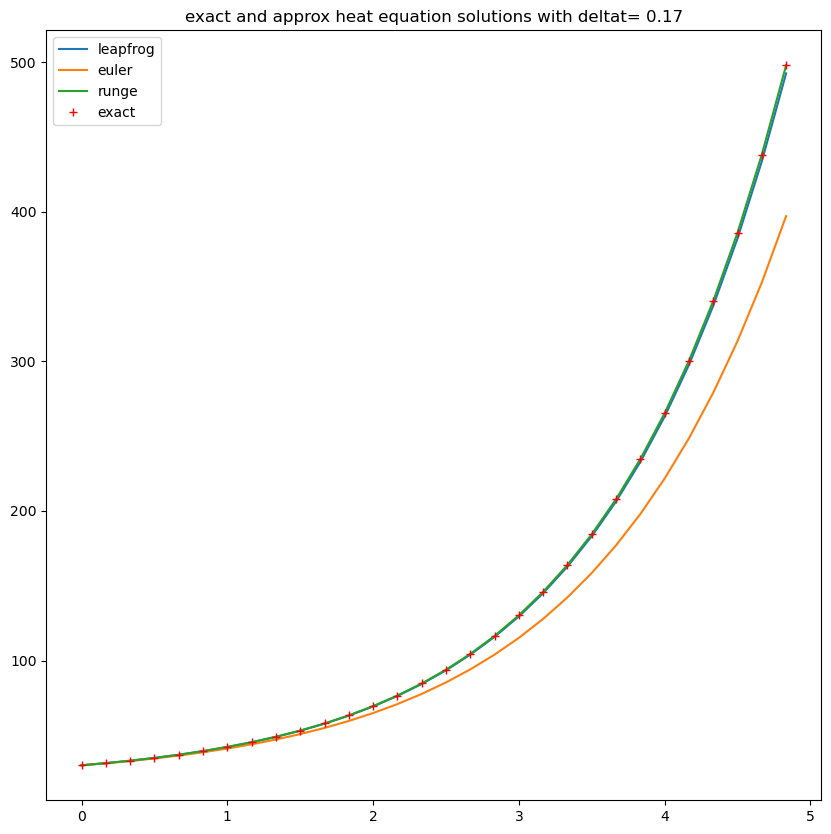

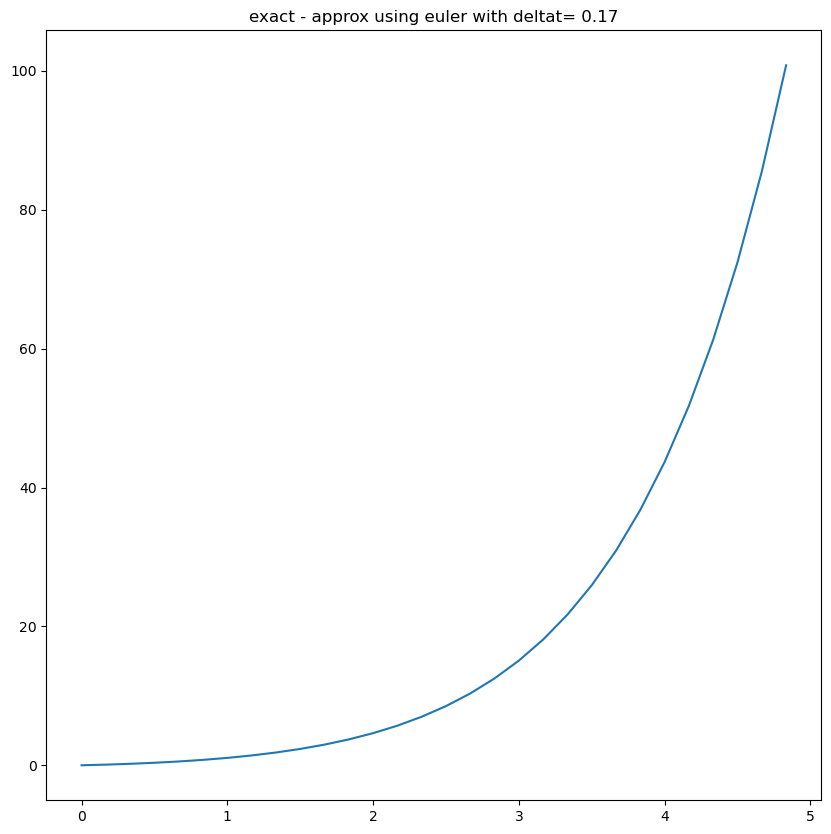

In [3]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = [3.0, 6.0, 10.0]
    theLambda = 0.8
    npts = 30
    
for 
    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = ['leapfrog', 'euler', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice)
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 1,figsize=(10,10))
    fun_choice = 'euler'
    approxTemp = keep_curves[fun_choice][1]
    difference = exactTemp - approxTemp
    ax2.plot(exactTime, difference)
    title = f"exact - approx using {fun_choice} with deltat={deltat:5.2g}"
    ax2.set(title=title)
    plt.show()


Problem: Backwards Euler 

In [1]:
# Import
import matplotlib.pyplot as plt
from lab2_functions import euler,beuler,leapfrog
import numpy as np

In [2]:
# Define
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}


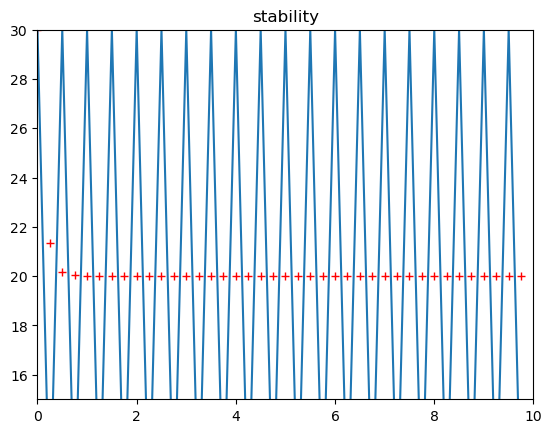

In [3]:
# Plot
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='beuler'
    npts=40
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
